In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from time_series_plots import plot_time_series

ModuleNotFoundError: No module named 'time_series_plots'

In [2]:
df = pd.read_csv('../data/all_monthly_data_clean.csv')
df.head()

,year,month,year_month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,cpi,shelter_yoy,energy_yoy,...,personal_interest_payments,tax_other_to_government,tax_personal_current,tax_gov_social_insurance_domestic,tax_total_all_taxes,cc_rate_all_ns,mortgage_rate_30_yr,cc_bals_30d_due_percentage,cc_bals_90d_due_percentage,cc_balance_total_billions
0,2019,December,2019-12,331345000.0,3.6,2.976407,2.285130,256.974,3.226840,3.437022,...,3.510450e+11,1.141310e+11,2.228563e+12,1.445443e+12,3.788137e+12,.,3.720,NaN,NaN,NaN
1,2019,November,2019-11,331213000.0,3.6,3.316327,2.051278,257.208,3.315695,-0.590061,...,3.493480e+11,1.144740e+11,2.222931e+12,1.445227e+12,3.782632e+12,14.87,3.695,NaN,NaN,NaN
2,2019,October,2019-10,331066000.0,3.6,3.142126,1.764043,257.346,3.355015,-4.166427,...,3.488320e+11,1.147100e+11,2.209687e+12,1.438320e+12,3.762717e+12,.,3.688,2.93,1.46,760.36
3,2019,September,2019-09,330904000.0,3.5,3.111274,1.711305,256.759,3.506051,-4.751840,...,3.494810e+11,1.148640e+11,2.194830e+12,1.429200e+12,3.738894e+12,.,3.605,NaN,NaN,NaN
4,2019,August,2019-08,330729000.0,3.6,3.419118,1.749780,256.558,3.352060,-4.389285,...,3.506330e+11,1.149560e+11,2.197049e+12,1.426682e+12,3.738687e+12,15.1,3.616,NaN,NaN,NaN


In [3]:
df_FRB = pd.read_csv('../data/frb_monthly_debt_bal_clean.csv')
df_FRB.head()

,year_month,percent_change_of_total_consumer_credit_seasonally_adjusted_at_an_annual_rate_(percent_1),percent_change_of_total_revolving_consumer_credit_seasonally_adjusted_at_an_annual_rate_(percent_1),percent_change_of_total_nonrevolving_consumer_credit_seasonally_adjusted_at_an_annual_rate_(percent_1),total_consumer_credit_owned_and_securitized_seasonally_adjusted_level_(currency_1000000),revolving_consumer_credit_owned_and_securitized_seasonally_adjusted_level_(currency_1000000),nonrevolving_consumer_credit_owned_and_securitized_seasonally_adjusted_level_(currency_1000000),total_consumer_credit_owned_and_securitized_not_seasonally_adjusted_level_(currency_1000000),total_securitized_consumer_credit_not_seasonally_adjusted_level_(currency_1000000),total_consumer_credit_owned_and_securitized_by_depository_institutions_not_seasonally_adjusted_level_(currency_1000000),...,finance_rate_on_personal_loans_at_commercial_banks_24_month_loan;_not_seasonally_adjusted_(percent_1),commercial_bank_interest_rate_on_credit_card_plans_all_accounts;_not_seasonally_adjusted_(percent_1),commercial_bank_interest_rate_on_credit_card_plans_accounts_assessed_interest;_not_seasonally_adjusted_(percent_1),new_car_average_finance_rate_at_auto_finance_companies_not_seasonally_adjusted_(discontinued_after_january_2011)_(percent_1),weighted-average_maturity_of_new_car_loans_at_auto_finance_companies_not_seasonally_adjusted_(discontinued_after_january_2011)_(months_1),loan-to-value_ratio_of_new_car_loans_at_auto_finance_companies_not_seasonally_adjusted_(discontinued_after_january_2011)_(percent_1),average_amount_financed_for_new_car_loans_at_auto_finance_companies_not_seasonally_adjusted_(discontinued_after_january_2011)_(currency_1),average_maturity_of_new_car_loans_at_finance_companies_amount_of_finance_weighted_not_seasonally_adjusted_(months_1),average_finance_rate_of_new_car_loans_at_finance_companies_amount_of_finance_weighted_not_seasonally_adjusted_(percent_1),average_amount_financed_for_new_car_loans_at_finance_companies_not_seasonally_adjusted_(currency_1)
0,1943-01,NaN,NaN,NaN,6577.83,NaN,6577.83,6550.0,NaN,2554.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1943-02,-20.94,NaN,-20.94,6463.04,NaN,6463.04,6276.0,NaN,2444.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1943-03,-42.49,NaN,-42.49,6234.21,NaN,6234.21,6099.0,NaN,2376.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1943-04,-20.88,NaN,-20.88,6125.75,NaN,6125.75,6065.0,NaN,2324.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1943-05,-37.12,NaN,-37.12,5936.26,NaN,5936.26,5967.0,NaN,2278.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_cc90 = pd.read_csv('../data/90_day_cc_delinquency_by_state.csv')
df_cc90.head()

,state,Q4_2003,Q4_2004,Q4_2005,Q4_2006,Q4_2007,Q4_2008,Q4_2009,Q4_2010,Q4_2011,...,Q4_2013,Q4_2014,Q4_2015,Q4_2016,Q4_2017,Q4_2018,Q4_2019,Q4_2020,Q4_2021,Q4_2022
0,AK,5.21,5.68,5.20,6.61,6.40,5.58,7.01,7.61,5.65,...,5.00,3.98,5.36,5.01,5.83,6.34,6.58,7.84,7.53,6.46
1,AL,11.92,11.09,10.70,11.88,11.07,10.13,11.61,11.94,10.23,...,9.05,7.69,7.45,7.16,7.68,7.73,8.37,9.14,8.53,8.17
2,AR,11.22,10.75,10.08,11.38,10.79,10.15,11.79,11.54,9.61,...,8.58,7.01,7.63,7.81,8.66,9.06,9.74,10.74,10.23,9.49
3,AZ,8.97,9.19,8.34,9.10,8.96,10.95,16.36,17.26,14.44,...,12.00,8.94,9.26,8.63,9.54,9.87,10.39,10.93,9.40,8.01
4,CA,8.84,8.55,7.65,8.98,9.32,11.57,17.19,17.71,14.87,...,11.14,8.06,8.48,8.15,8.37,8.23,8.70,10.41,9.07,7.90


In [5]:
df_auto90 = pd.read_csv('../data/90_day_autoloan_delinquency_by_state.csv')
df_auto90.head()

,state,Q4_2003,Q4_2004,Q4_2005,Q4_2006,Q4_2007,Q4_2008,Q4_2009,Q4_2010,Q4_2011,...,Q4_2013,Q4_2014,Q4_2015,Q4_2016,Q4_2017,Q4_2018,Q4_2019,Q4_2020,Q4_2021,Q4_2022
0,AK,0.83,1.04,1.06,0.91,1.17,1.28,1.70,2.18,1.99,...,1.69,1.78,1.70,2.09,2.41,2.29,2.53,2.93,2.53,2.05
1,AL,2.63,2.80,2.41,2.88,3.43,4.48,5.69,6.33,5.76,...,4.82,4.97,4.87,5.32,5.75,6.15,6.59,6.22,5.79,5.58
2,AR,2.06,2.30,1.77,2.21,2.62,3.14,3.98,4.26,3.72,...,2.53,3.03,3.19,3.89,4.39,4.97,5.47,5.33,4.60,4.38
3,AZ,2.86,2.92,2.43,2.60,3.82,5.70,7.46,8.78,8.13,...,4.87,4.46,4.01,4.29,4.57,4.75,5.22,4.89,4.00,3.73
4,CA,1.89,2.10,1.90,2.62,3.60,4.98,6.18,6.48,5.50,...,3.07,2.85,2.55,2.92,3.63,4.15,4.89,4.80,3.83,3.35


In [6]:
# Add a column for above or below 2% inflation 


In [7]:
# Focusing on imports, vehicles, disposable personal income, govt benefits (medicare/medicaid etc), taxes

In [8]:
df_subset = pd.merge(df, df_FRB, on='year_month', how='left')
df_subset = df_subset[['year_month', 'year', 'month', 'cpi_yoy', 'cpi', 'imports_yoy', 'new_&_used_vehicles_yoy', 'personal_saving_as_a_percentage_of_disposable_personal_income',
                'disp_inc_per_capita_current_dollars', 'tax_total_all_taxes', 'total_gov_social_benefits', 'social_security', 
                'medicare', 'medicaid', 'unemployment_insurance', "veterans'_benefits",
                 'cc_bals_90d_due_percentage', 'cc_bals_30d_due_percentage', 
                 'total_consumer_credit_owned_and_securitized_not_seasonally_adjusted_level_(currency_1000000)',
                 'disp_inc_per_capita_chained_2017',
                 'percent_change_of_total_consumer_credit_seasonally_adjusted_at_an_annual_rate_(percent_1)']]
df_subset

,year_month,year,month,cpi_yoy,cpi,imports_yoy,new_&_used_vehicles_yoy,personal_saving_as_a_percentage_of_disposable_personal_income,disp_inc_per_capita_current_dollars,tax_total_all_taxes,...,social_security,medicare,medicaid,unemployment_insurance,veterans'_benefits,cc_bals_90d_due_percentage,cc_bals_30d_due_percentage,total_consumer_credit_owned_and_securitized_not_seasonally_adjusted_level_(currency_1000000),disp_inc_per_capita_chained_2017,percent_change_of_total_consumer_credit_seasonally_adjusted_at_an_annual_rate_(percent_1)
0,2019-12,2019,December,2.285130,256.974,0.482315,-0.609494,6.4,49360.0,3.788137e+12,...,1.037704e+12,7.983300e+11,6.145150e+11,2.795200e+10,1.381160e+11,NaN,NaN,4192191.46,47337.0,8.31
1,2019-11,2019,November,2.051278,257.208,-1.188590,-0.429314,7.1,49538.0,3.782632e+12,...,1.044767e+12,7.980450e+11,6.219440e+11,2.672600e+10,1.366920e+11,NaN,NaN,4151299.35,47638.0,0.57
2,2019-10,2019,October,1.764043,257.346,-2.961808,0.248925,7.3,49355.0,3.762717e+12,...,1.045621e+12,7.972400e+11,6.253800e+11,2.553100e+10,1.352670e+11,1.46,2.93,4139132.38,47477.0,5.01
3,2019-09,2019,September,1.711305,256.759,-2.114330,0.479750,7.2,49197.0,3.738894e+12,...,1.037586e+12,7.959160e+11,6.241500e+11,2.420700e+10,1.338030e+11,NaN,NaN,4124134.66,47419.0,3.81
4,2019-08,2019,August,1.749780,256.558,-2.115987,0.391399,7.0,49063.0,3.738687e+12,...,1.033881e+12,7.940720e+11,6.223780e+11,2.496300e+10,1.324870e+11,NaN,NaN,4109832.46,47332.0,4.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2020-05,2020,May,0.117926,256.394,-6.299213,-0.709141,22.7,53561.0,3.619760e+12,...,1.076108e+12,8.156900e+11,6.554210e+11,1.116350e+12,1.448080e+11,NaN,NaN,4080765.85,51566.0,-5.58
284,2020-04,2020,April,0.329097,256.389,-6.782334,-1.022733,32.0,56378.0,3.519355e+12,...,1.074763e+12,7.999880e+11,6.356780e+11,3.697220e+11,1.434660e+11,1.32,2.40,4086496.90,54327.0,-18.13
285,2020-03,2020,March,1.539327,258.115,-4.186414,-0.440493,12.5,49327.0,3.775790e+12,...,1.072869e+12,7.989240e+11,6.132870e+11,6.712100e+10,1.423950e+11,NaN,NaN,4147835.00,47329.0,-5.47
286,2020-02,2020,February,2.334874,258.678,-1.270850,-0.421730,7.7,50193.0,3.874954e+12,...,1.067653e+12,7.982930e+11,6.026520e+11,2.768200e+10,1.411110e+11,NaN,NaN,4179968.43,48014.0,3.89


In [9]:
df_subset.describe()

,year,cpi_yoy,cpi,imports_yoy,new_&_used_vehicles_yoy,personal_saving_as_a_percentage_of_disposable_personal_income,disp_inc_per_capita_current_dollars,tax_total_all_taxes,total_gov_social_benefits,social_security,medicare,medicaid,unemployment_insurance,veterans'_benefits,cc_bals_90d_due_percentage,cc_bals_30d_due_percentage,total_consumer_credit_owned_and_securitized_not_seasonally_adjusted_level_(currency_1000000),disp_inc_per_capita_chained_2017,percent_change_of_total_consumer_credit_seasonally_adjusted_at_an_annual_rate_(percent_1)
count,288.000000,276.000000,288.000000,276.000000,276.000000,276.000000,276.000000,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,45.000000,45.000000,2.880000e+02,276.000000,288.000000
mean,2011.500000,2.528411,226.432326,1.722039,1.126088,5.791304,40431.054348,2.950428e+12,2.458130e+12,7.818118e+11,5.671920e+11,4.689099e+11,8.380492e+10,8.193042e+10,1.201556,2.449111,3.029237e+06,42484.927536,4.683507
std,6.934236,1.834622,34.816007,7.015737,4.588820,3.337217,9279.270569,8.984741e+11,1.008843e+12,2.573222e+11,2.102521e+11,1.818466e+11,1.597169e+11,4.672087e+10,0.236758,0.400414,9.326196e+05,4483.042985,4.075954
min,2000.000000,-2.097161,168.800000,-19.118644,-4.369919,1.400000,26946.000000,1.743536e+12,1.100584e+12,4.192080e+11,2.314920e+11,2.108160e+11,1.927700e+10,2.598000e+10,0.720000,1.560000,1.549328e+06,35843.000000,-18.130000
25%,2005.750000,1.513777,198.775000,-1.861140,-0.994445,4.400000,33488.000000,2.226716e+12,1.610008e+12,5.459690e+11,4.061582e+11,3.106480e+11,3.056850e+10,3.937325e+10,1.030000,2.220000,2.333328e+06,39571.750000,3.620000
50%,2011.500000,2.160308,226.777000,1.372079,0.052547,5.400000,38930.500000,2.605036e+12,2.325272e+12,7.608470e+11,5.542080e+11,4.198940e+11,3.386550e+10,7.004400e+10,1.170000,2.470000,2.746061e+06,40941.500000,5.070000
75%,2017.250000,3.258220,247.081000,6.500790,1.358399,6.300000,46365.750000,3.527758e+12,2.904630e+12,9.646590e+11,7.187922e+11,5.862602e+11,6.796425e+10,1.176918e+11,1.340000,2.740000,3.821109e+06,45643.750000,6.812500
max,2023.000000,9.059758,307.789000,21.399177,23.533280,32.000000,65833.000000,5.001717e+12,8.124572e+12,1.379646e+12,9.531250e+11,9.162080e+11,1.434899e+12,1.739310e+11,1.730000,3.190000,5.010284e+06,61509.000000,19.730000


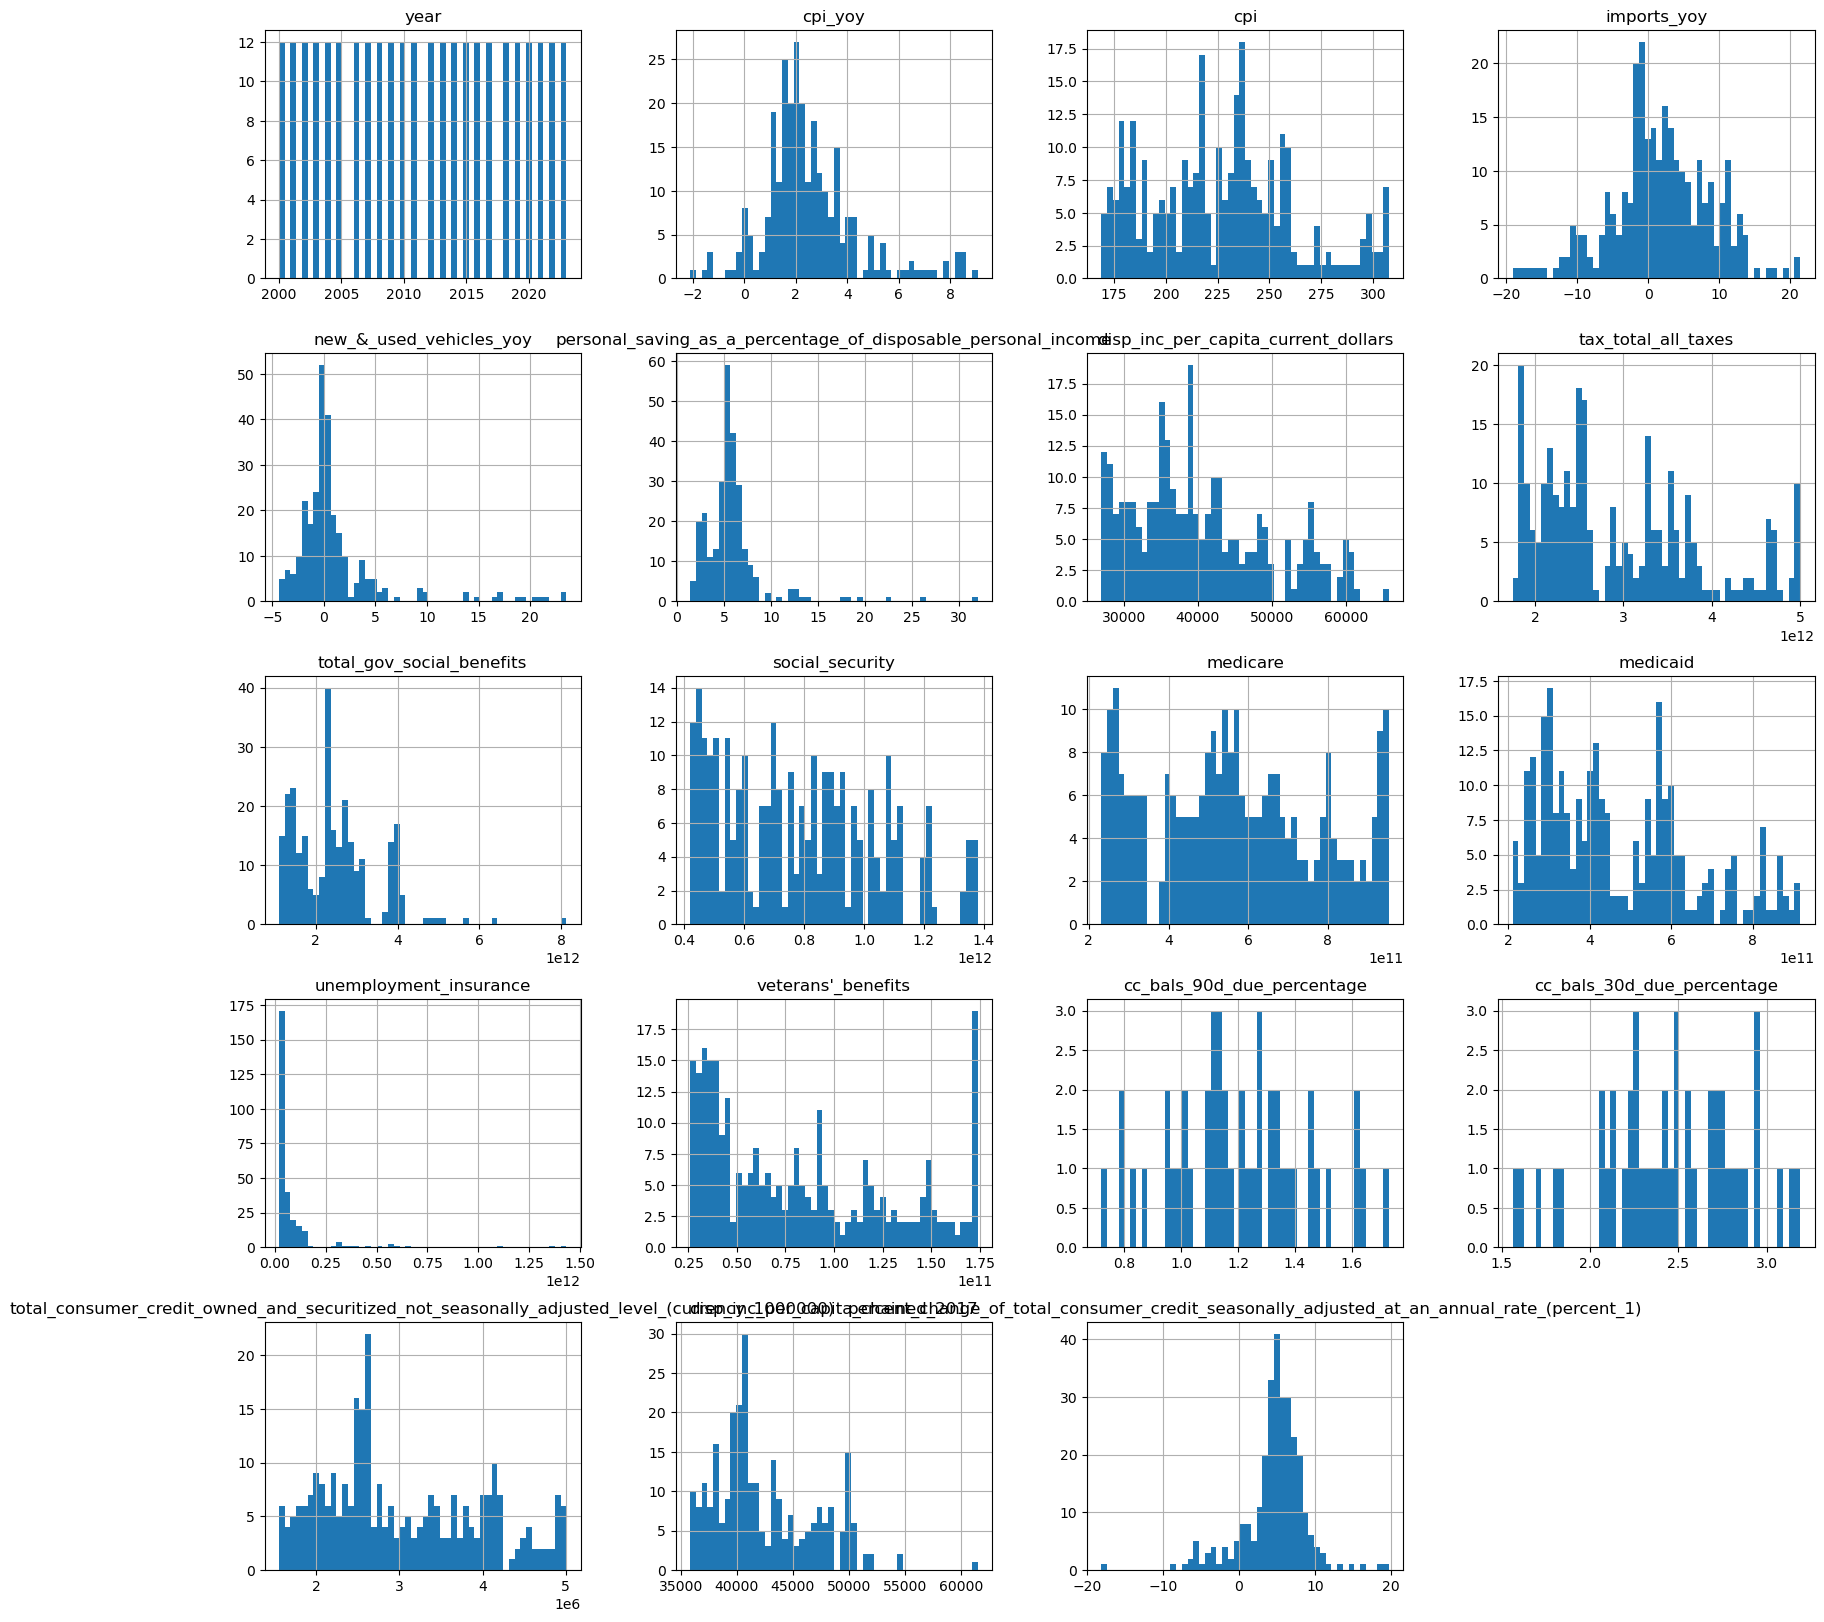

In [10]:
df_subset.hist(bins = 50, figsize = (20, 20));

In [11]:
df_subset['year_month'] = pd.to_datetime(df_subset['year_month'])

### Savings as Percent of Disposible Income

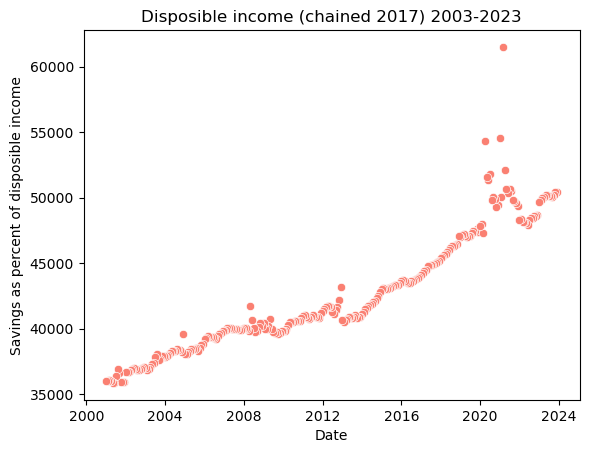

In [12]:
sns.scatterplot(df_subset, x = 'year_month', y ='disp_inc_per_capita_chained_2017', color = 'salmon')
plt.title('Disposible income (chained 2017) 2003-2023')

plt.xlabel('Date')
plt.ylabel('Savings as percent of disposible income');

In [13]:
df_subset.corr(numeric_only=True)['disp_inc_per_capita_chained_2017'].sort_values(ascending=False)

disp_inc_per_capita_chained_2017                                                                1.000000
disp_inc_per_capita_current_dollars                                                             0.977136
total_gov_social_benefits                                                                       0.971143
veterans'_benefits                                                                              0.953940
total_consumer_credit_owned_and_securitized_not_seasonally_adjusted_level_(currency_1000000)    0.948420
medicare                                                                                        0.948201
social_security                                                                                 0.940439
year                                                                                            0.939644
medicaid                                                                                        0.938460
tax_total_all_taxes                                    

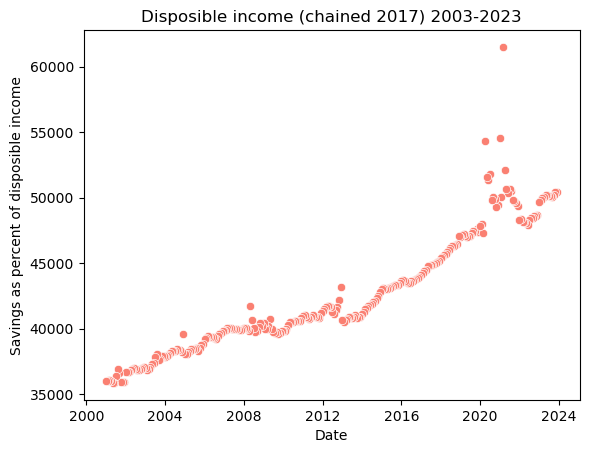

In [14]:
sns.scatterplot(df_subset, x = 'year_month', y ='disp_inc_per_capita_chained_2017', color = 'salmon')
plt.title('Disposible income (chained 2017) 2003-2023')

plt.xlabel('Date')
plt.ylabel('Savings as percent of disposible income');

### Savings as % of disposible Income

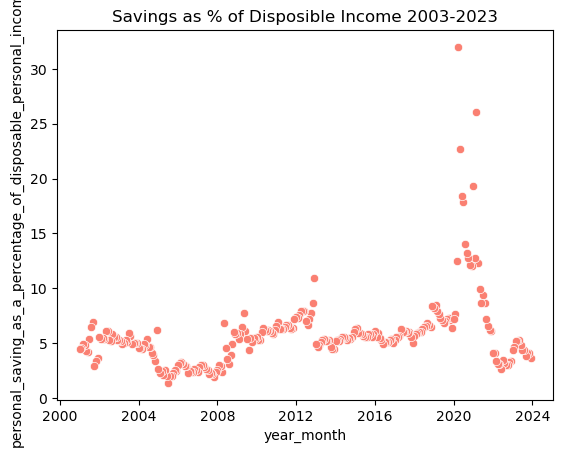

In [15]:
sns.scatterplot(df_subset, x = 'year_month', y ='personal_saving_as_a_percentage_of_disposable_personal_income'
                , color = 'salmon')
plt.title('Savings as % of Disposible Income 2003-2023');

In [16]:
df_subset.corr(numeric_only=True)['personal_saving_as_a_percentage_of_disposable_personal_income'].sort_values(ascending=False)

personal_saving_as_a_percentage_of_disposable_personal_income                                   1.000000
unemployment_insurance                                                                          0.721666
total_gov_social_benefits                                                                       0.627349
disp_inc_per_capita_chained_2017                                                                0.545301
disp_inc_per_capita_current_dollars                                                             0.405410
year                                                                                            0.374101
veterans'_benefits                                                                              0.371647
medicare                                                                                        0.356862
social_security                                                                                 0.340768
total_consumer_credit_owned_and_securitized_not_seasona

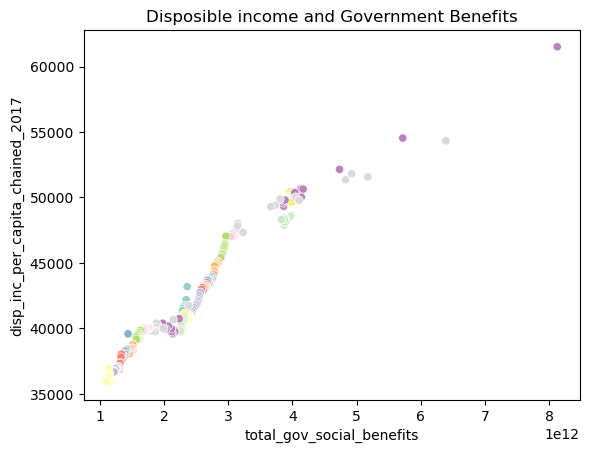

In [17]:
sns.scatterplot(df_subset, x = 'total_gov_social_benefits', y ='disp_inc_per_capita_chained_2017', 
                 hue='year', palette="Set3", legend = None)
plt.title('Disposible income and Government Benefits');

## Inflation

Text(0.5, 1.0, 'CPI Rate 2003-2023')

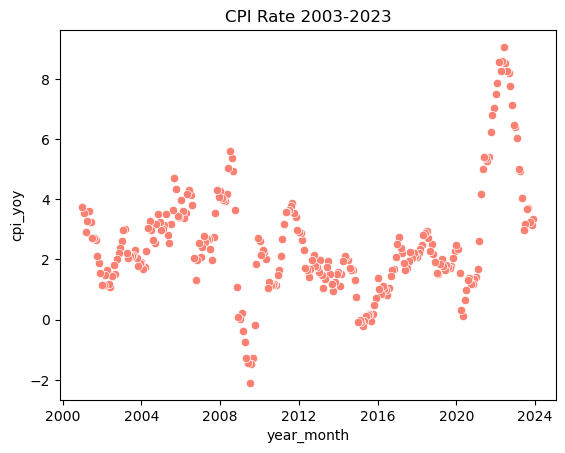

In [18]:
sns.scatterplot(df_subset, x = 'year_month', y ='cpi_yoy', color = 'salmon')
plt.title('CPI Rate 2003-2023')

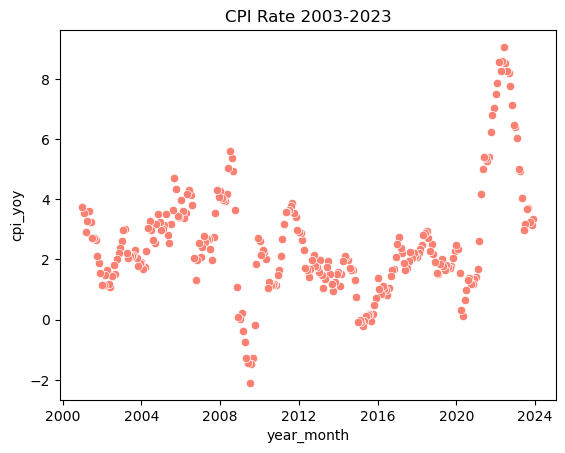

In [19]:
sns.scatterplot(df_subset, x = 'year_month', y ='cpi_yoy', color = 'salmon')
plt.title('CPI Rate 2003-2023');

In [20]:
df_subset.columns

Index(['year_month', 'year', 'month', 'cpi_yoy', 'cpi', 'imports_yoy',
       'new_&_used_vehicles_yoy',
       'personal_saving_as_a_percentage_of_disposable_personal_income',
       'disp_inc_per_capita_current_dollars', 'tax_total_all_taxes',
       'total_gov_social_benefits', 'social_security', 'medicare', 'medicaid',
       'unemployment_insurance', 'veterans'_benefits',
       'cc_bals_90d_due_percentage', 'cc_bals_30d_due_percentage',
       'total_consumer_credit_owned_and_securitized_not_seasonally_adjusted_level_(currency_1000000)',
       'disp_inc_per_capita_chained_2017',
       'percent_change_of_total_consumer_credit_seasonally_adjusted_at_an_annual_rate_(percent_1)'],
      dtype='object')

In [21]:
# 
df_subset.corr(numeric_only=True)['personal_saving_as_a_percentage_of_disposable_personal_income'].sort_values(ascending=False)

personal_saving_as_a_percentage_of_disposable_personal_income                                   1.000000
unemployment_insurance                                                                          0.721666
total_gov_social_benefits                                                                       0.627349
disp_inc_per_capita_chained_2017                                                                0.545301
disp_inc_per_capita_current_dollars                                                             0.405410
year                                                                                            0.374101
veterans'_benefits                                                                              0.371647
medicare                                                                                        0.356862
social_security                                                                                 0.340768
total_consumer_credit_owned_and_securitized_not_seasona